c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Initial Department Distribution:
department
produce            28.485335
dairy eggs         16.051834
snacks              8.821794
beverages           8.319515
frozen              7.537189
pantry              5.968522
bakery              3.603076
canned goods        3.437657
deli                3.249353
dry goods pasta     2.811515
household           2.421456
meat seafood        2.322285
breakfast           2.227129
personal care       1.449220
babies              1.087467
international       0.834521
alcohol             0.573344
pets                0.314376
missing             0.278040
other               0.121253
bulk                0.085118
Name: count, dtype: float64
Balanced Department Distribution:
department
dairy eggs         4.761905
snacks             4.761905
other              4.761905
personal care      4.761905
international      4.761905
dry goods pasta    4.761905
pets               4.761905
babies             4.761905
deli               4.761905
household          4.7

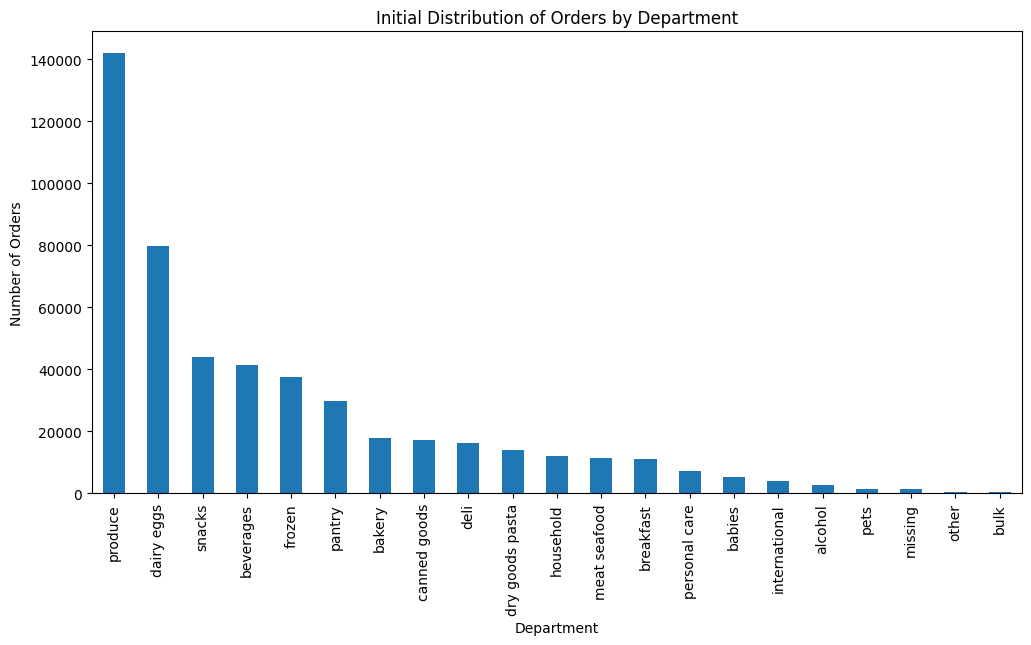

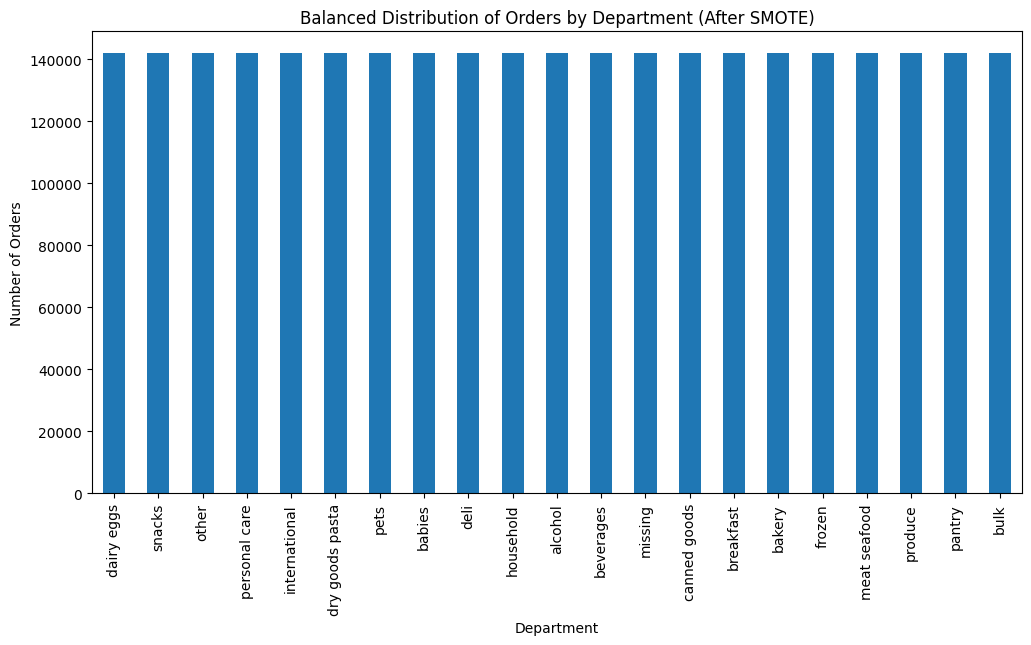

Balanced dataset saved successfully.


In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
file_path = "C:\\Users\\Matias\\Desktop\\TrabajoFinal_MasterBigData\\00_Data_Bases\\Cluster5_1_items.csv"
df = pd.read_csv(file_path)

# Check initial department distribution
initial_distribution = df["department"].value_counts()
print("Initial Department Distribution:")
print(initial_distribution / len(df) * 100)

# Encode categorical features
categorical_cols = ["department", "product_name", "order_time_list", "order_number_group", "day"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numerical labels
    label_encoders[col] = le  # Store encoder for later decoding

# Separate features and target variable
X = df.drop(columns=["department"])
y = df["department"]

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert balanced dataset back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["department"] = y_resampled  # Reattach target column

# Decode categorical values back (optional)
df_balanced["department"] = label_encoders["department"].inverse_transform(df_balanced["department"])

# Check new department distribution
balanced_distribution = df_balanced["department"].value_counts()
print("Balanced Department Distribution:")
print(balanced_distribution / len(df_balanced) * 100)

# Plot before and after distributions
plt.figure(figsize=(12, 6))
initial_distribution.plot(kind="bar")
plt.xlabel("Department")
plt.ylabel("Number of Orders")
plt.title("Initial Distribution of Orders by Department")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
balanced_distribution.plot(kind="bar")
plt.xlabel("Department")
plt.ylabel("Number of Orders")
plt.title("Balanced Distribution of Orders by Department (After SMOTE)")
plt.xticks(rotation=90)
plt.show()

# Export balanced dataset
df_balanced.to_csv("C:\\Users\\Matias\\Desktop\\TrabajoFinal_MasterBigData\\00_Data_Bases\\Cluster5_1_balanced.csv", index=False)
print("Balanced dataset saved successfully.")